In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## shRNA 

Here I've downloaded a public subset for demonstration from Achilles: 
https://portals.broadinstitute.org/achilles


House keeping genes from Nanostring white paper:
https://www.pmgenomics.ca/pmgenomics/services/pdf/Nanostring_norm.pdf

In [2]:
achilles = pd.read_csv(open("/mnt/bay1/bioinfo/Achilles_QC_v2.4.3.rnai.gct",'r'),
                       sep="\t",skiprows=2)

In [3]:
achilles_melted = pd.melt(achilles,id_vars=['Name','Description'])
achilles_melted['tissue'] = achilles_melted['variable'].map(lambda x: x.split('_')[-1])
achilles_melted['cell_type'] = achilles_melted['variable'].map(lambda x: '_'.join(x.split('_')[:-1]))

In [4]:
house_keeping = ['ACTB'] #Just one example gene for now
pos_control = ['ERBB2']
testing = ["GBAS","GRB7","HEATR6","LANCL2","PDSS2","PPFIA1","PPME1","RPS6KB1","SUMF2","TACO1","UBE2Z"]
# capture_tissues=['KIDNEY','BREAST','OVARY','LUNG']
capture_tissues=['BREAST']
all_genes = house_keeping+pos_control+testing
def label_genes(x):
    if x in house_keeping:
        return "house_keeping"
    elif x in pos_control:
        return "pos_control"
    elif x in testing:
        return "testing"

In [5]:
achilles_melted['class'] = achilles_melted['Description'].map(lambda x: label_genes(x))
achilles_melted_subset = achilles_melted[(achilles_melted['Description'].isin(all_genes)) &
                                        (achilles_melted['tissue'].isin(capture_tissues))]

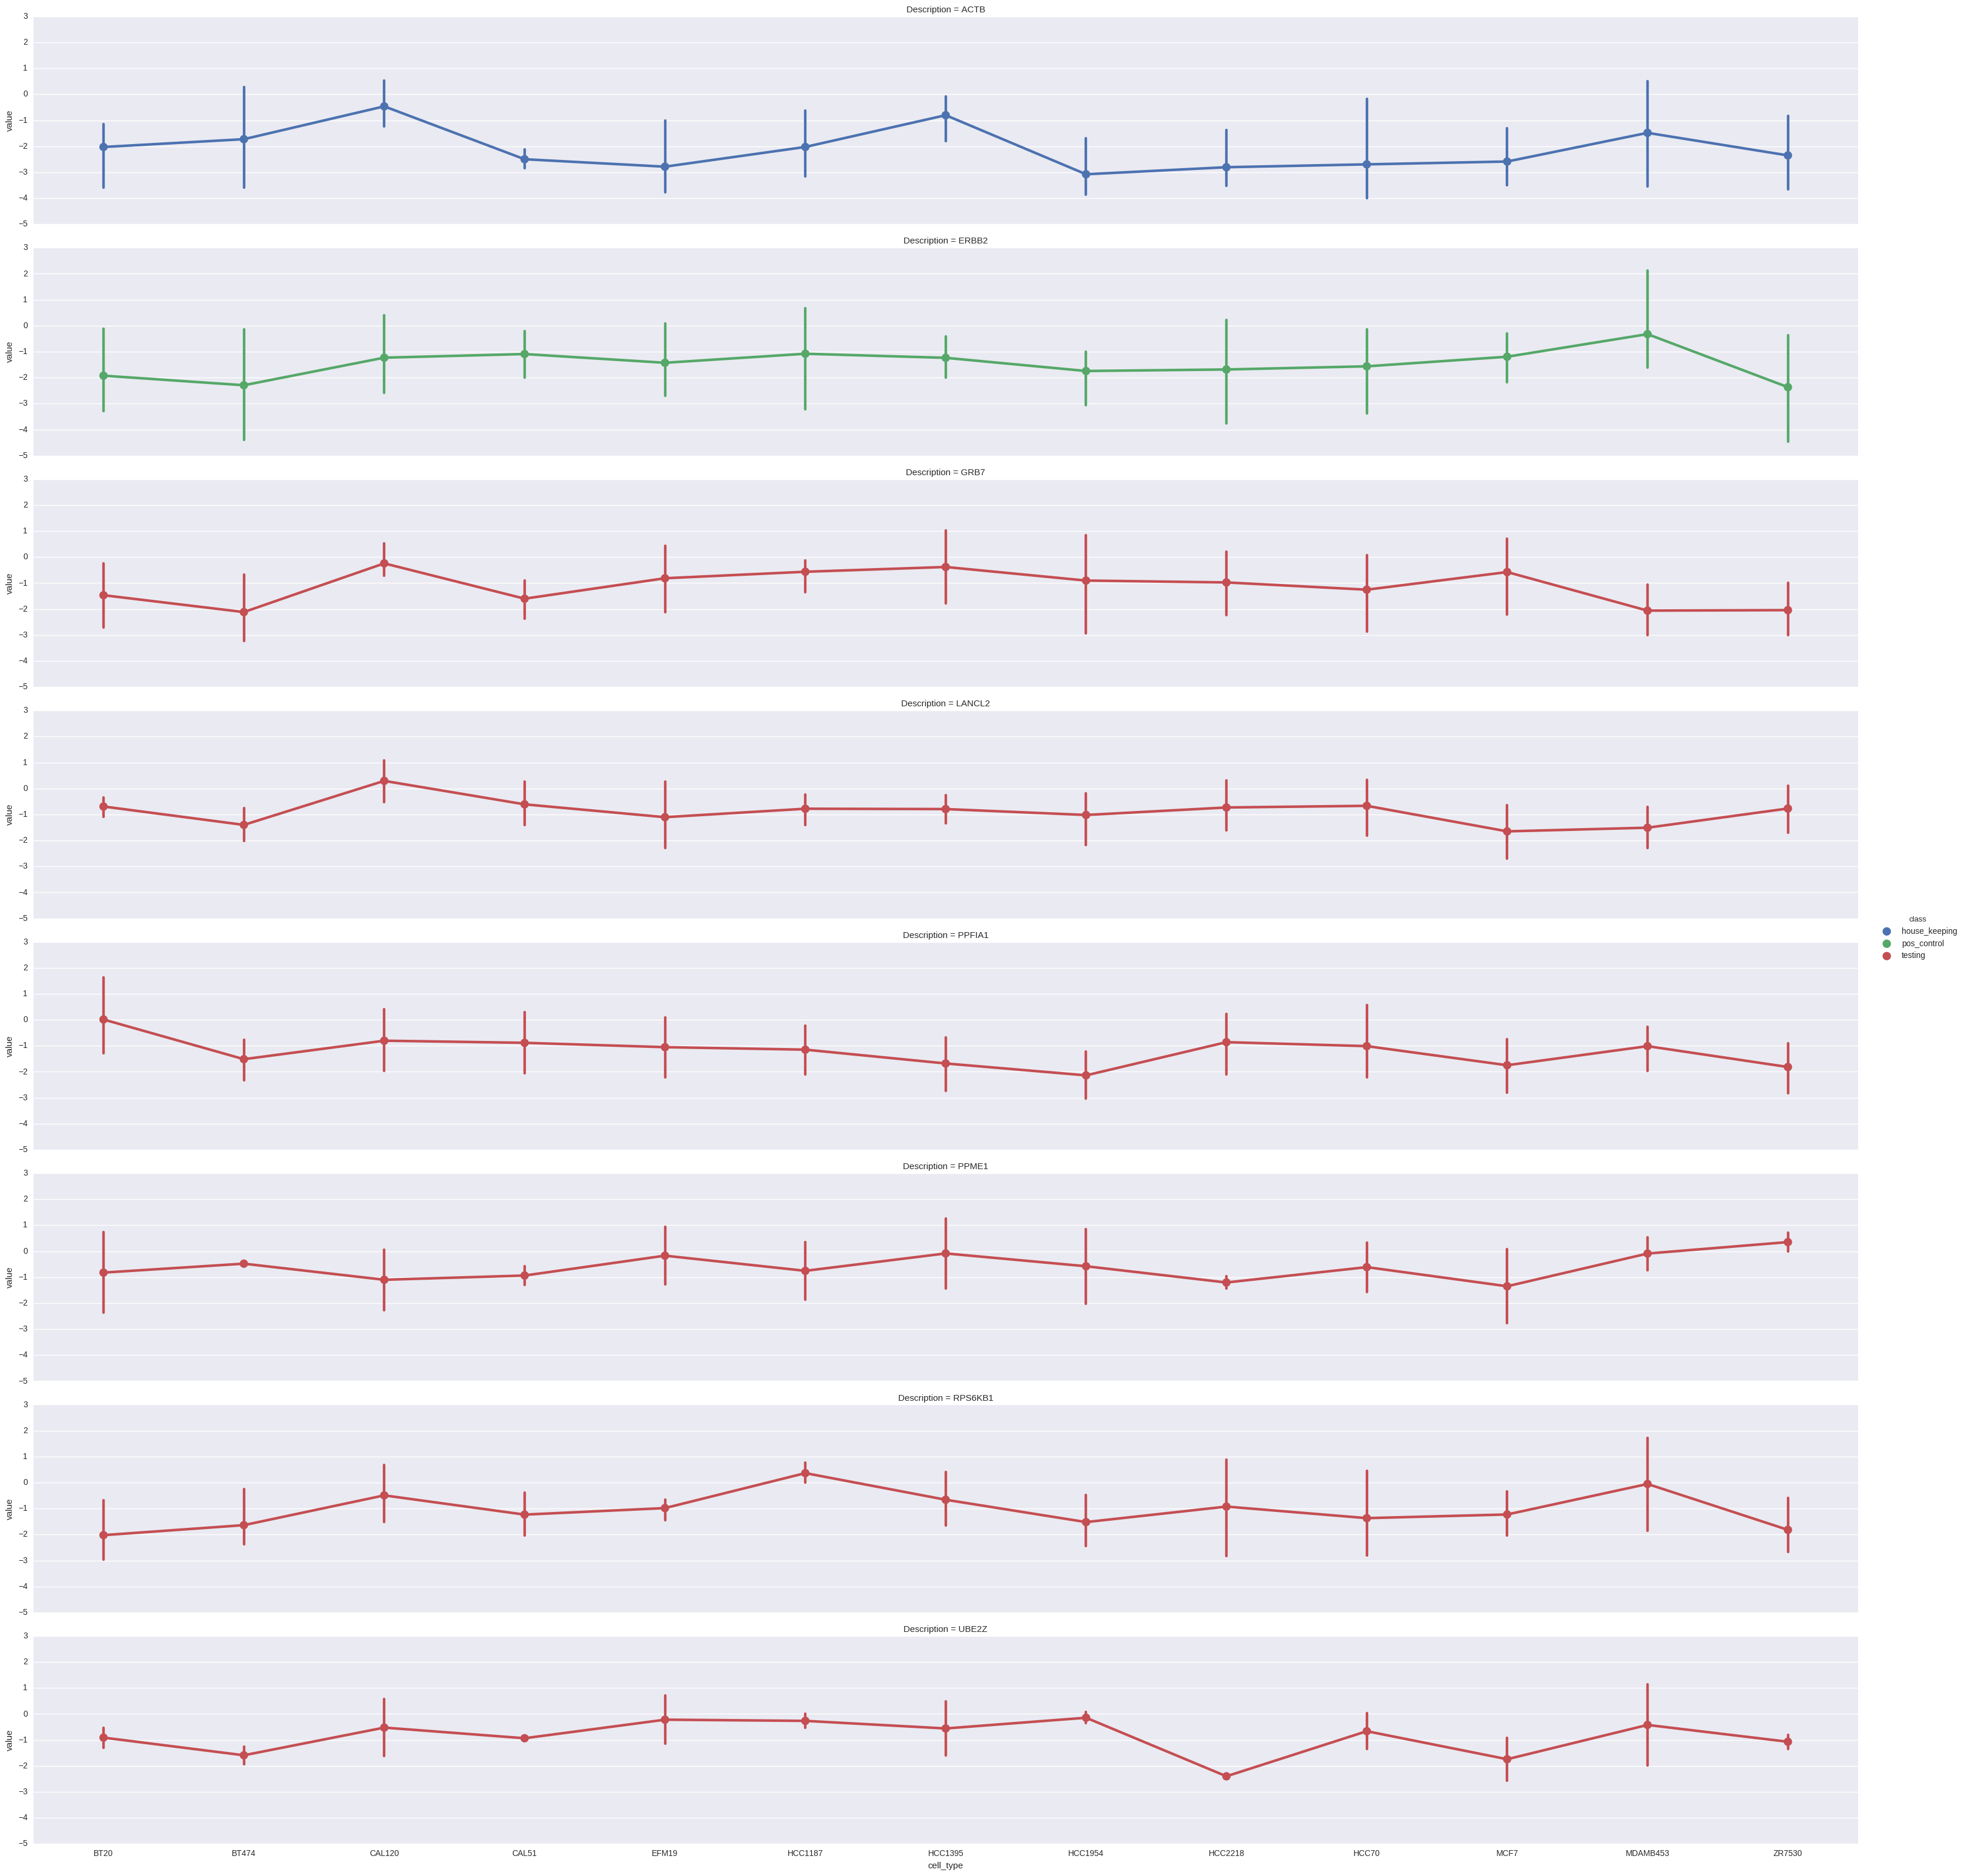

In [35]:
sns.factorplot(x='cell_type',y='value',
               row='Description',hue='class',
               data=achilles_melted_subset,aspect=8,size=4)

In [18]:
dat_lab.unique()

array(['CGAAACTACCTTCAACTCCAT_ACTB', 'CGAGAAGATGACCCAGATCAT_ACTB',
       'CGTGCGTGACATTAAGGAGAA_ACTB', 'GTTGCTATCCAGGCTGTGCTA_ACTB',
       'CAGTGCCAATATCCAGGAGTT_ERBB2', 'CAGTTACCAGTGCCAATATCC_ERBB2',
       'GCCATCAAAGTGTTGAGGGAA_ERBB2', 'CCAGGGCTTTGTCCTCTCTTT_GRB7',
       'CCTTGAGAAGTGCCTCAGATA_GRB7', 'CGCCAAGTACGAACTGTTCAA_GRB7',
       'CGGAAGCTTTGGAAACGCTTT_GRB7', 'GCCATCTGCATCCATCTTGTT_GRB7',
       'CGGGAAGATCATTCATAATTT_LANCL2', 'GCAGGCGTACAAGGTCTTTAA_LANCL2',
       'GCAGGTTATCTGTATGCCTTA_LANCL2', 'GCATGGCTGGAATTTACTATA_LANCL2',
       'GCATTCCTGACAGACCCTATT_LANCL2', 'GAGGAGATTGAAAGTCGAGTT_PPFIA1',
       'GCACAGTTGGAGGAGAAGAAT_PPFIA1', 'GCATATTAACAAGCCAGCAAA_PPFIA1',
       'GCTCCAAGAAATCATAAGTAA_PPFIA1', 'GTAGTTTGTTAGAAGAGGAAT_PPFIA1',
       'CCCAGGTTAAATACAGCCCAT_PPME1', 'GTACAGCTATGGATGCACTTA_PPME1',
       'AGCACAGCAAATCCTCAGACA_RPS6KB1', 'CCCATGATCTCCAAACGGCCA_RPS6KB1',
       'GCATCGGCACCACTTCCAATA_RPS6KB1', 'TATTTGCCATGAAGGTGCTTA_RPS6KB1',
       'CCTGGCTTTGTTGCTTC

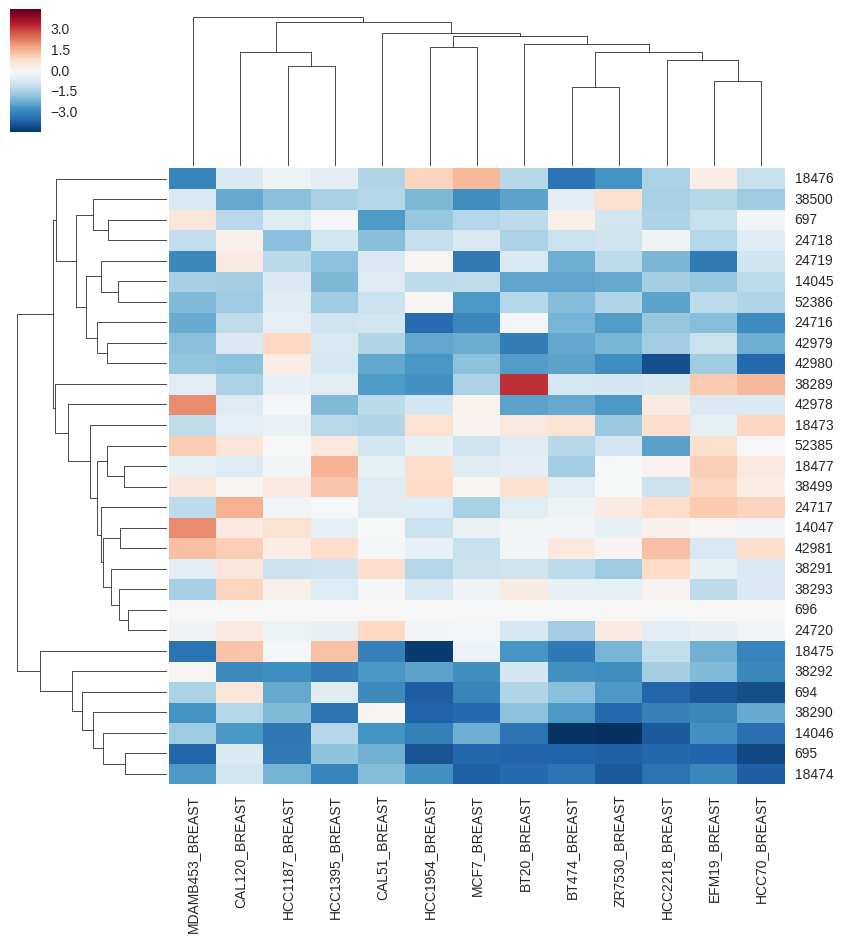

In [12]:
keep_cols = [col for col in achilles.columns if col not in(['Name','Description'])]
keep_cols_breast = [col for col in keep_cols if 'BREAST' in col]
dat=achilles[keep_cols_breast][achilles['Description'].isin(all_genes)].fillna(0)
dat_lab= achilles['Name'][achilles['Description'].isin(all_genes)]
g = sns.clustermap(dat)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#sns.clustermap(achilles[achilles['Description'].isin(all_genes)])

In [21]:
achilles[achilles['Description'] == 'ERBB2']

,Name,Description,22RV1_PROSTATE,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,786O_KIDNEY,A1207_CENTRAL_NERVOUS_SYSTEM,A172_CENTRAL_NERVOUS_SYSTEM,A204_SOFT_TISSUE,A2058_SKIN,A549_LUNG,...,TT_OESOPHAGUS,TYKNU_OVARY,U178_CENTRAL_NERVOUS_SYSTEM,U251MG_CENTRAL_NERVOUS_SYSTEM,U343_CENTRAL_NERVOUS_SYSTEM,U87MG_CENTRAL_NERVOUS_SYSTEM,UOK101_KIDNEY,VCAP_PROSTATE,YKG1_CENTRAL_NERVOUS_SYSTEM,ZR7530_BREAST
14045,CAGTGCCAATATCCAGGAGTT_ERBB2,ERBB2,-0.736622,-1.407289,-2.033701,-0.988015,-1.091667,-1.307404,-2.130767,-1.512816,...,1.047945,-1.261694,-0.842781,-1.334283,-0.043608,-1.000647,0.093131,-0.783776,-1.036456,-2.272149
14046,CAGTTACCAGTGCCAATATCC_ERBB2,ERBB2,-1.398042,-2.489590,-1.271391,-2.514138,-1.606551,-2.994614,-3.204587,-2.095960,...,-3.633489,-2.015079,-1.929811,-3.298038,-3.178754,-0.687155,-0.291915,-0.971961,-3.689307,-4.457513
14047,GCCATCAAAGTGTTGAGGGAA_ERBB2,ERBB2,0.945311,-0.974441,0.643360,0.194111,1.004926,-0.295015,0.960626,0.785881,...,1.238369,0.690591,0.743963,-0.391566,0.462815,0.297585,-0.083241,-0.882978,1.321424,-0.367947
